**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_FOLDER_REGION = "fcc_astarr_macs_merge"

## Import data

In [3]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz 
K562.hg38.ASTARR.macs.KS91.input.rep_all.union.q5.bed.gz 
summary 


In [4]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

description.tsv 
metadata.label.tsv 


In [5]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cname     = dat
vec_txt_cname = dat$Name
fun_display_table(head(dat))

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Region,chr:start-end for each row


In [6]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname = "K562.hg38.ASTARR.macs.KS91.input.rep_all.union.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_atac_union = dat
fun_display_table(head(dat))

Chrom,ChromStart,ChromEnd,Region
chr1,10015,10442,chr1:10015-10442
chr1,14253,14645,chr1:14253-14645
chr1,16015,16477,chr1:16015-16477
chr1,17237,17772,chr1:17237-17772
chr1,28903,29613,chr1:28903-29613
chr1,30803,31072,chr1:30803-31072


In [7]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_atac_overlap = dat
fun_display_table(head(dat))

Chrom,ChromStart,ChromEnd,Region
chr1,10038,10405,chr1:10038-10405
chr1,14282,14614,chr1:14282-14614
chr1,16025,16338,chr1:16025-16338
chr1,17288,17689,chr1:17288-17689
chr1,28934,29499,chr1:28934-29499
chr1,115429,115969,chr1:115429-115969


## Explore data

**Helper function to get the mode of a continuous variable**

In [8]:
get_mode_continuous <- function(x, ...) {
    obj = density(x, ...)
    num = obj$x[which.max(obj$y)]
    return(num)
}

**Summary of region length**

In [9]:
dat = dat_region_atac_union
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)
vec = dat$Length

cat("#{Region} =", nrow(dat), "\n")
summary(vec)

num = quantile(vec, probs=0.9, na.rm=TRUE)
cat("90th percentile", num, "\n")

num = get_mode_continuous(vec)
cat("Mode:", num, "\n")

#{Region} = 246852 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  218.0   435.0   665.0   800.2  1031.0  6251.0 

90th percentile 1475 
Mode: 422.7296 


In [10]:
dat = dat_region_atac_overlap
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)
vec = dat$Length

cat("#{Region} =", nrow(dat), "\n")
summary(vec)

num = quantile(vec, probs=0.9, na.rm=TRUE)
cat("90th percentile", num, "\n")

num = get_mode_continuous(vec)
cat("Mode:", num, "\n")

#{Region} = 150042 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   401.0   597.0   712.8   909.0  6172.0 

90th percentile 1293 
Mode: 342.22 


**Distribution of region length**

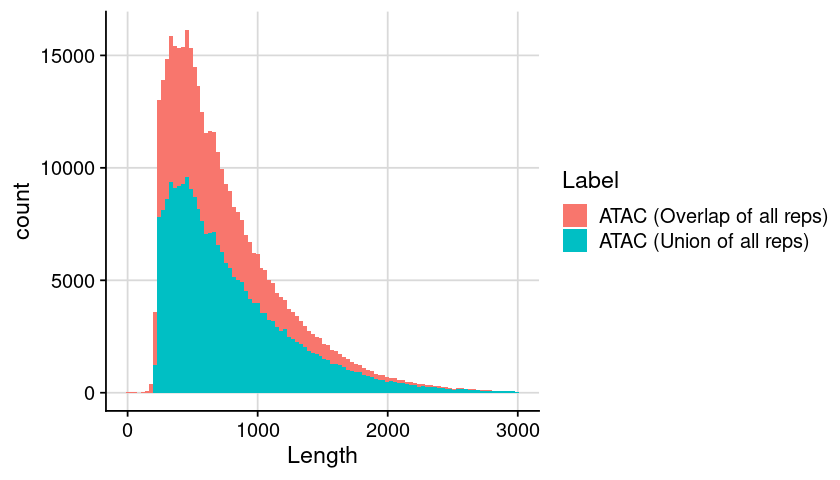

In [11]:
lst = list(
    "ATAC (Union of all reps)"   = dat_region_atac_union,
    "ATAC (Overlap of all reps)" = dat_region_atac_overlap
)

dat  = bind_rows(lst, .id = "Label")
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 3000)

gpt = ggplot(dat, aes(x = Length, fill = Label)) + 
    geom_histogram(bins = 100) + 
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

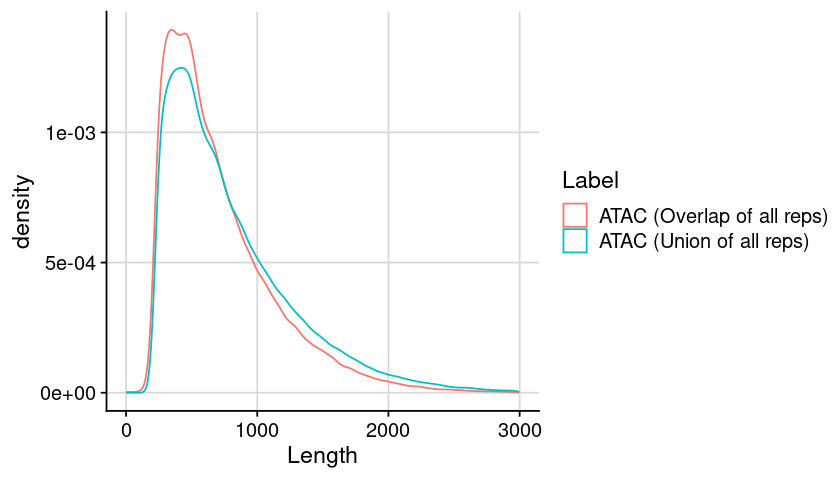

In [12]:
lst = list(
    "ATAC (Union of all reps)"   = dat_region_atac_union,
    "ATAC (Overlap of all reps)" = dat_region_atac_overlap
)

dat  = bind_rows(lst, .id = "Label")
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 3000)

gpt = ggplot(dat, aes(x = Length, color = Label)) + 
    geom_density() +
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

## Save figures

In [13]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 14)
)

In [14]:
### combine data
lst = list(
    "ATAC (Union of all reps)"   = dat_region_atac_union,
    "ATAC (Overlap of all reps)" = dat_region_atac_overlap
)

dat  = bind_rows(lst, .id = "Label")
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)
dat_region_merge = dat

### compute counts _after_ the same filtering
dat = dat_region_merge
dat = dat %>%
    group_by(Label) %>%
    summarise(
        Count = n(), 
        Mode  = get_mode_continuous(Length),
        .groups="drop")
dat_region_count = dat

### build a named vector of new legend labels, each with two lines:
###   original label
###   Count = 12345
dat = dat_region_count
vec = dat %>%
    dplyr::mutate(
        line1 = Label,
        line2 = paste("Count =", scales::comma(Count)),
        line3 = paste("Mode =", round(Mode), "bp"),
        combined = paste0(line1, "\n", line2, "\n", line3)
    ) %>%
    { set_names(.$combined, .$Label) }
vec_txt_region_label = vec

print(vec_txt_region_label)

                                  ATAC (Overlap of all reps) 
"ATAC (Overlap of all reps)\nCount = 150,042\nMode = 342 bp" 
                                    ATAC (Union of all reps) 
  "ATAC (Union of all reps)\nCount = 246,852\nMode = 423 bp" 


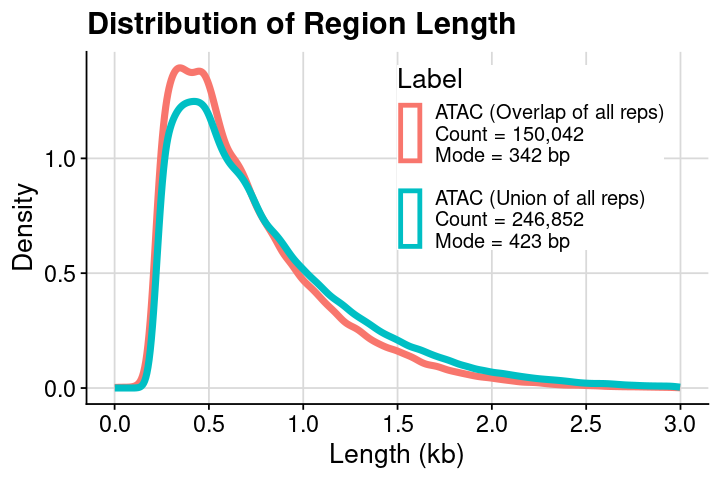

In [15]:
### set limit
dat = dat_region_merge
dat = dat %>% dplyr::filter(Length < 3000)

### gplot distribution
gpt = ggplot(dat, aes(x = Length/1000, colour = Label)) +
    geom_density(linewidth = 2) +
    scale_x_continuous(breaks = seq(0, 3, by = 0.5)) +
    scale_y_continuous(breaks = c(0, 0.5, 1.0)) +
    scale_color_discrete(
        ### replace each original level by our multi‐line version
        labels = vec_txt_region_label
    ) +
    labs(x = "Length (kb)", y = "Density", title = "Distribution of Region Length") +
    theme_cowplot() + 
    background_grid() +
    theme_text +
    theme(
        legend.position = "inside", 
        legend.position.inside = c(0.5, 0.7),
        legend.background = element_rect(fill = "white"),
        legend.key.spacing.y = unit(0.5, 'cm')
    )

gpt_export = gpt
options(repr.plot.height=4, repr.plot.width=6)
print(gpt)

In [16]:
txt_fdiry = "./"
txt_fname = "fig.region.fcc_astarr_macs_input_merge.distribution.region_length.below3k.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export, height = 4, width = 6, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.fcc_astarr_macs_input_merge.distribution.region_length.below3k.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, gpt_export, height = 4, width = 6, units = "in")